<a href="https://colab.research.google.com/github/varuni7/Advent-of-code2022/blob/main/Assert_PVL_AI_ML_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Data Exploration 

checking for null values, object data types and other things we might consider in order to keep our data clean and well structured.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Varuni/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Gender is misspelt as Genre in the dataset,
therefore we will replace it ,
Also rename the column names in snake case

In [ ]:
df = df.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score','Genre':'Gender','CustomerID':'Coustomer_ID'})

In [ ]:
df.shape

(200, 5)

In [ ]:
#checking  for null values
df.isna().sum()

CustomerID        0
Genre             0
Age               0
Annual_income     0
Spending_score    0
dtype: int64

In [ ]:
#Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Coustomer_ID    200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_income   200 non-null    int64 
 4   Spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Gender is not an integer , therefore we will use one-hot encoding .



*   0->Male
*   1->Female




In [ ]:
df['Gender'].replace(['Female','Male'], [1,0],inplace=True)

In [ ]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [ ]:
#Checking values have been replaced properly
df.Gender

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

1    112
0     88
Name: Gender, dtype: int64

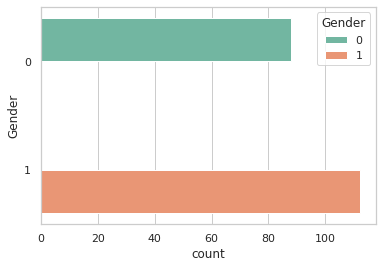

In [ ]:
#Count and plot gender
sns.countplot(y = 'Gender', data = df, palette="Set2", hue = "Gender",orient='h')
df["Gender"].value_counts()

We have 112 female and 88 male

In [ ]:
df.corr()

,Coustomer_ID,Gender,Age,Annual_income,Spending_score
Coustomer_ID,1.000000,-0.057400,-0.026763,0.977548,0.013835
Gender,-0.057400,1.000000,-0.060867,-0.056410,0.058109
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Annual_income,0.977548,-0.056410,-0.012398,1.000000,0.009903
Spending_score,0.013835,0.058109,-0.327227,0.009903,1.000000


## boxplot to check for outliers

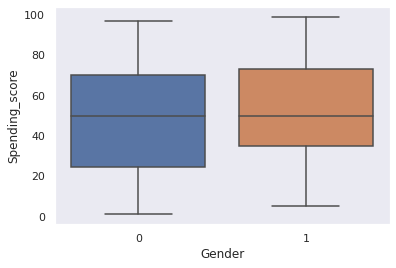

In [ ]:
sns.boxplot(x=df['Gender'],y=df['Spending_score'])
plt.show()

#Data Preprocessing 

Normalizing all the columns


In [ ]:
from sklearn.preprocessing import StandardScaler
col_names = ['Annual_income', 'Age', 'Spending_score']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Annual_income,Age,Spending_score
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


# Data Visualization

## Distribution of Annnual Income

Text(0, 0.5, 'Count')

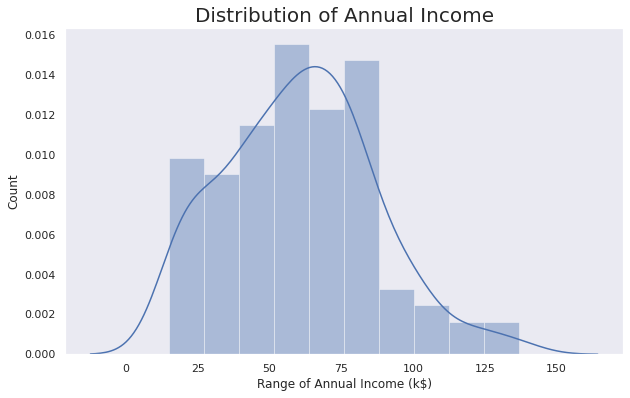

In [ ]:

plt.figure(figsize=(10, 6))
sns.set(style = 'dark')
sns.distplot(df['Annual_income'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

This is a Gaussian distribution with the majority annual income between 50k\$ to 87k\$

## Density estimation of values using distplot

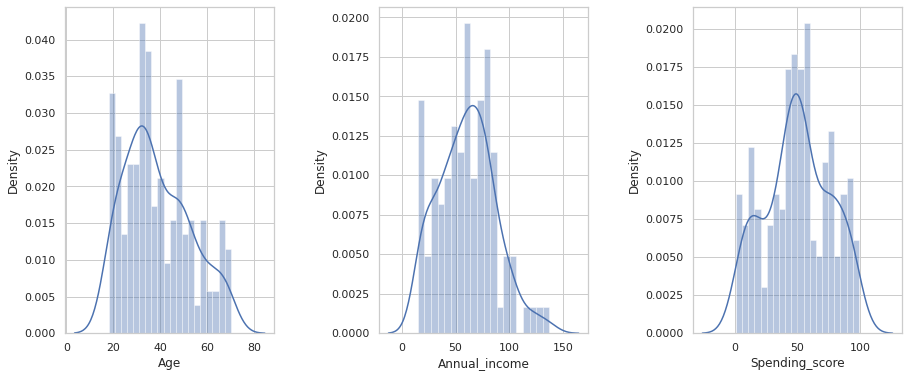

In [ ]:

plt.figure(1 , figsize = (15 , 6))
feature_list = ['Age','Annual_income', "Spending_score"]
feature_listt = ['Age','Annual_income', "Spending_score"]
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[i], bins=20, kde = True)
    pos = pos + 1
plt.show()

Gender will only be used to make data separation so we can analyze results for men and women.

We will use pairplots to visualize the distinction between shopping patterns in male and female better 

## pairplots to visualize the distinction between shopping patterns in male and female 

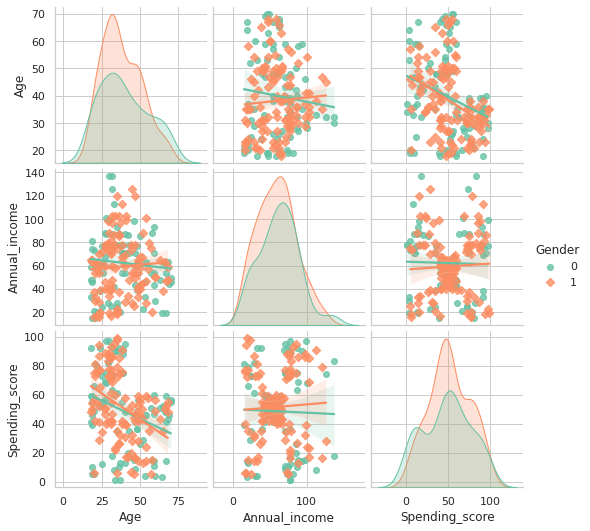

In [ ]:
sns.pairplot(df, vars=["Age", "Annual_income", "Spending_score"],  kind ="reg", hue = "Gender", palette="Set2", markers = ['o','D'])

## Spending Score vs Annual income with age as a heatmap

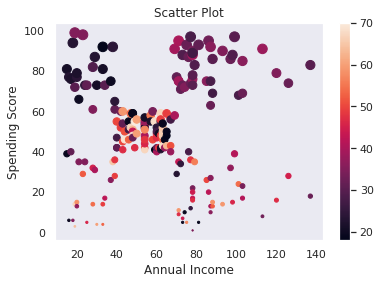

In [ ]:
plt.scatter(df['Annual_income'],df['Spending_score'],c=df['Age'],s=df['Spending_score'])
plt.xlabel('Annual Income')
plt.ylabel("Spending Score")
plt.title('Scatter Plot')
plt.colorbar()
plt.show()

Here we can see that , as the annual income increases, the spending score also increases . 

the different colors are a heatmap for the age. 
black,purple,violet represent people in ther 20,30,40 whereas the more orangish colors represent people in their 50,60,70

Youngsters (people in their 20's and 30's )though having less annual income have a higher spending score

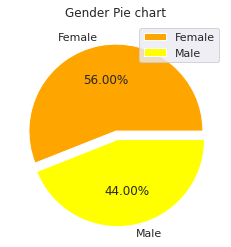

In [ ]:
labels=['Female','Male']
colors=['Orange','Yellow']
explode=[0,0.1]
plt.title('Gender Pie chart')
plt.pie(df['Gender'].value_counts(),explode=explode,labels=labels,colors=colors,autopct='%0.2f%%')
plt.legend()
plt.show()

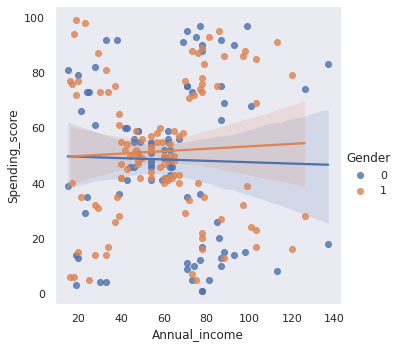

In [ ]:
sns.lmplot(x = "Annual_income", y = "Spending_score", data = df, hue = "Gender")

We can see that a higher yearly income generally results in a higher spending score, particularly for women. However, the correlation between these two factors is not very strong, as most individuals fall within the middle range, where they earn decent salaries and have moderately high spending scores.

## Age and Spending Score

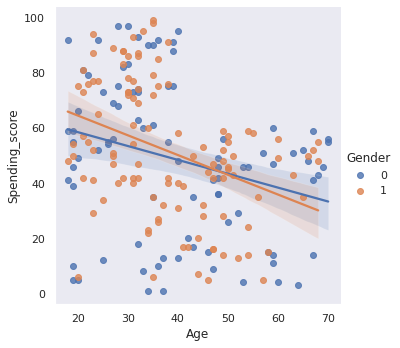

In [ ]:
sns.lmplot(x = "Age", y = "Spending_score", data = df, hue = "Gender")

young people overspend , especially females 

older people have a max spending score of only around 60. Therefore both male and female senior citizens do not overspend 

# Coustomer Segmentation 

Customer segmentation involves categorizing customers based on different attributes such as age, gender, buying behavior, etc. 
This allows businesses to gain a better understanding of their customers and make informed decisions regarding product development and marketing strategies. Essentially, by dividing customers into distinct groups, businesses can tailor their approach to each group's unique needs and preferences.

## k-Means Clustering 

why k-Means clustering:


*   k-Means clustering is best suited for unlabeled data and our data is unlabeled 
*   Generalizes to clusters of different shapes and sizes, such as elliptical clusters.



In [ ]:
#Creating values for the elbow
X = df.loc[:,["Age", "Gender", "Spending_score","Annual_income"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

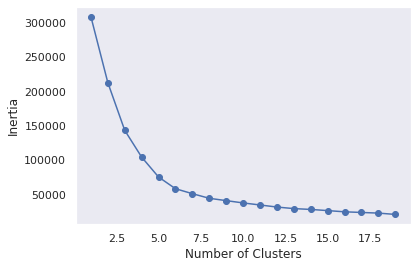

In [ ]:
#Plotting the elbow
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

## Why Elbow method for choosing the k value

The elbow method is used to determine the best number of clusters in k-means clustering by plotting the cost function against different values of k. The cost function used here is the sum of squared distances of samples to the nearest cluster center. The goal is to choose a number of clusters where adding more clusters doesn't significantly improve the data modeling. In this example, we can visualize the plot as an arm and identify the elbow where the number of clusters is around 5. Thus, 5 clusters are chosen to divide the data.

## Training kmeans with 5 clusters

In [ ]:

means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(X)
labels = means_k.labels_
centroids = means_k.cluster_centers_

In [ ]:

trace1 = go.Scatter3d(
    x= X['Annual_income'],
    y= X['Spending_score'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Annual_income'),
            yaxis = dict(title  = 'Spending_score'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

## Analysis of the clusters 
The clusters are categorized based on people's income, age, and spendinf score.
 * The yellow cluster includes young people with
moderate to low annual income who spend a lot. 
 * The purple cluster includes reasonably young people with decent salaries who are also heavy spenders. 
 * The pink cluster comprises people of all ages with moderate spending scores and low salaries. 
 * The orange cluster consists of people aged between thirty and sixty with high salaries but low spending habits. 
 * The blue cluster includes people of all ages with low salaries and minimal spending habits.

In [ ]:
trace1 = go.Scatter3d(
    x= X['Gender'],
    y= X['Spending_score'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Gender'),
            yaxis = dict(title  = 'Spending_score'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

The activity is to segment the users based on Age , Gender and Interest(assumed to be spending score)

But from the data visualization stage itself we came to know that gender isn't really affecting the spending score substantially. We only saw a small inference that women in ther 20's and 30's spend slightly more than their male counterparts

To further illustrate the fact that gender isnt having a very big impact on the spending score I have made 3-d scatter plots with 

1. annual income, spending score, age
2. gender , spending sscore, age

All that gender does is seperate the data into 2 columns , 

* 1->Female 
* 2-> Male 

All the colors exist in both groups alomst equally 

Female category (1) have slightly more pink clusters compared to male which might suggest that Females with low income slightly spend more thsn male with more income. 

# Assumptions :

1. Only cis-male and cis-female genders are considered 
2. The activity specifies segmentation based on Age , income and "interest" but there is no feild specifying "interest" in the datasset provided . Therefore I have assumed that by interest they mean spending score and have proceeded 